In [1]:
import sionna.rt as rt
import numpy as np
import matplotlib.pyplot as plt

熱雑音(thermal noise power)は、$\eta k T B=k T_r B$で定式化できる。

- $\eta$: 雑音指数
- $k$: ボルツマン定数
- $T$: 温度
- $T_r$: 雑音温度

$\gamma = P_r/P_n = \frac{1}{kBL_p} (G/T) (EIRP)$

- CNR: 搬送波と雑音電力の比
- $G$: 受信アンテナの利得
- $T$: 雑音温度
- $EIRP$: 実行放射電力(equivalent isotropic radiated power)、送信電力と送信アンテナの積

$\frac{1}{kBL_p}$がほとんど変化しない状況下では、$G/T$が重要な指標となる。

雑音温度を変化させた時の影響をsionnaで確認する。

In [2]:
scene = rt.Scene()

tx = rt.Transmitter(name="tx", position=[0, 0, 1])
scene.add(tx)
rx = rt.Receiver(name="rx", position=[0, 0, 10])
scene.add(rx)

scene.tx_array = rt.PlanarArray(num_rows=1, num_cols=1, pattern="iso", polarization="V")
scene.rx_array = rt.PlanarArray(num_rows=1, num_cols=1, pattern="iso", polarization="V")

p_solver = rt.PathSolver()
paths = p_solver(
    scene=scene,
    synthetic_array=False,
    seed=2913,
)

rm_solver = rt.RadioMapSolver()

distance = 1e3
cell_size = 1
rm = rm_solver(
    scene=scene,
    max_depth=5,
    center=[distance / 2, 0, 0],
    size=[distance, cell_size],
    orientation=[0, 0, 0],
    cell_size=[cell_size, cell_size],
    samples_per_tx=10**9,
)

fig = scene.preview(
    paths=paths,
    radio_map=rm,
)

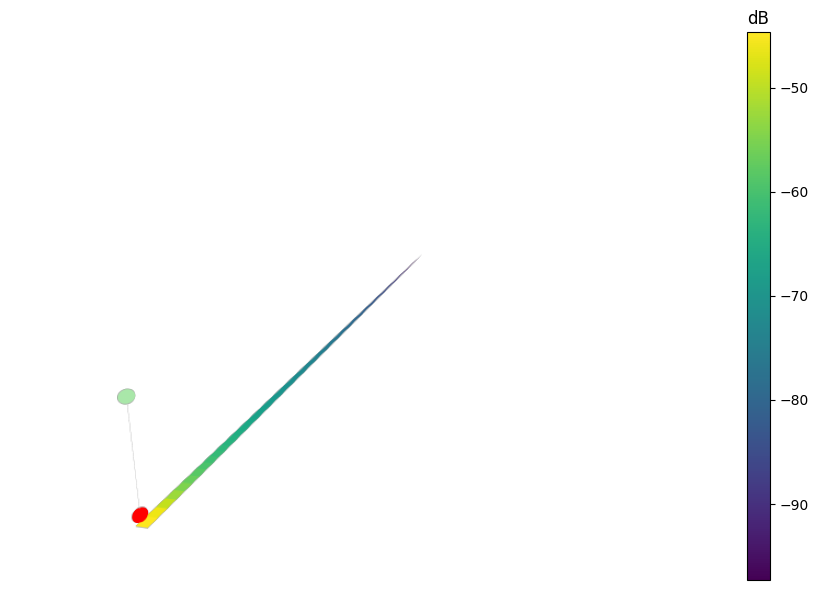

In [3]:
fig = scene.render(
    camera=rt.Camera(position=[-20,-20,20], look_at=[100,0,0]),
    paths=paths,
    radio_map=rm,
    num_samples=512,
    fov=90,
    rm_show_color_bar=True,
)

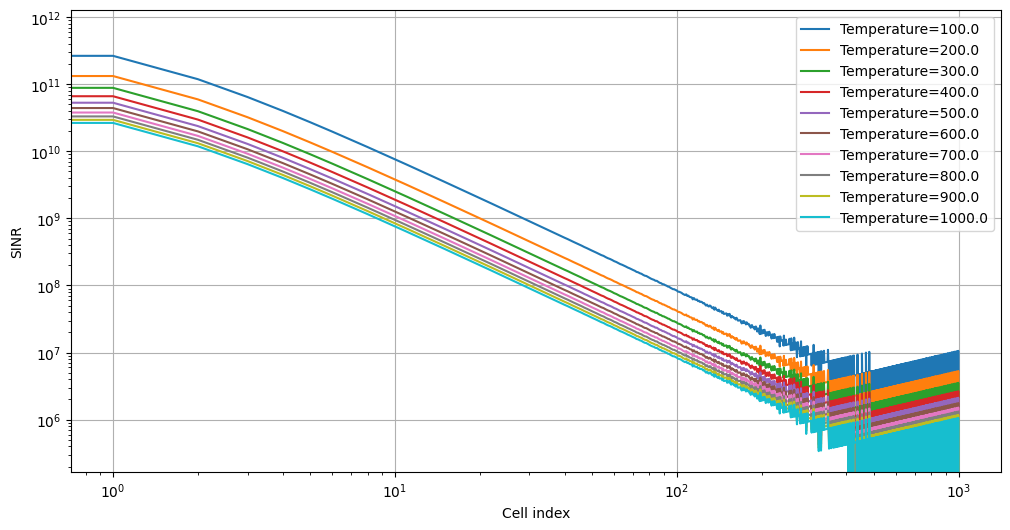

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
temperatures = np.linspace(100, 1000, 10, endpoint=True)
for t in temperatures:
    scene.temperature = t
    rm = rm_solver(
        scene=scene,
        max_depth=5,
        center=[distance / 2, 0, 0],
        size=[distance, cell_size],
        orientation=[0, 0, 0],
        cell_size=[cell_size, cell_size],
        samples_per_tx=10**9,
    )
    ax.plot(np.squeeze(rm.sinr), label=f"Temperature={t}")
ax.set_xlabel("Cell index")
ax.set_ylabel("SINR")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
ax.legend()
plt.show()